In [1]:
import tensorflow as tf

train_ds, test_ds = tf.keras.utils.image_dataset_from_directory(
    "../data/data3",
    validation_split=0.2,
    subset="both",
    seed=42,
    image_size=(200,200),
    batch_size=32,
)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Using 400 files for validation.


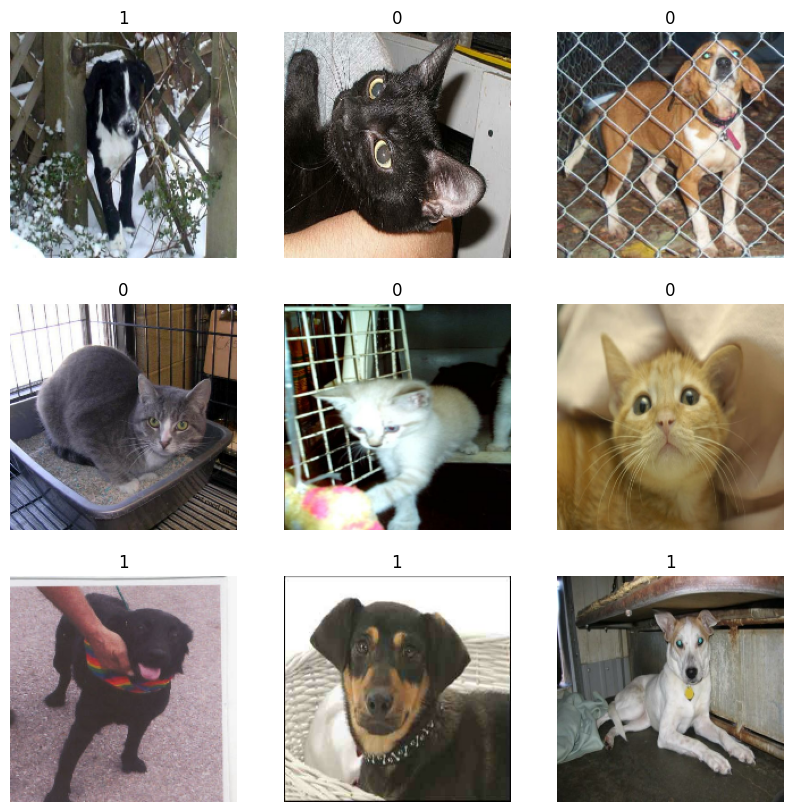

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [3]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
    ]
)

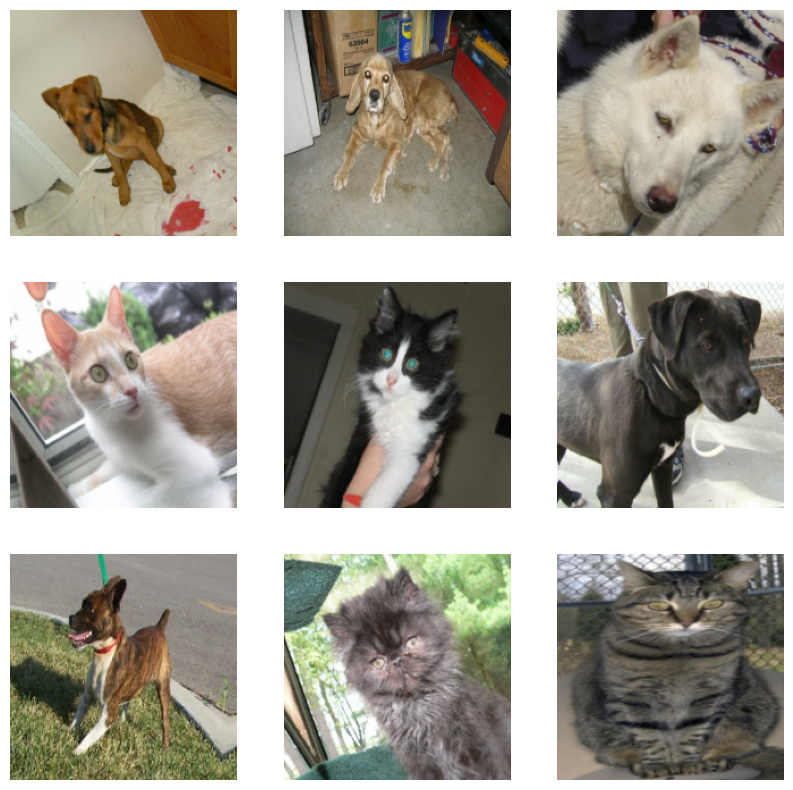

In [4]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.axis("off")

In [5]:
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label)
)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [6]:
# входной слой - размер (200, 200, 3)
inputs = tf.keras.Input(shape=(200, 200, 3))
# преобразуем значения пикселей из [0, 255] к [0, 1]
x = tf.keras.layers.Rescaling(1.0 / 255)(inputs)
x = tf.keras.layers.Conv2D(64, 3, strides=2, padding="same", activation = 'relu')(x)
x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)
x = tf.keras.layers.Conv2D(128, 4, strides=2, padding="same", activation = 'relu')(x)
x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation="relu")(x)
outputs = tf.keras.layers.Dense(2, activation="softmax")(x)
model = tf.keras.Model(inputs, outputs)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 128)       131200    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 128)      0         
 2D)                                                         

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [9]:
model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
50/50 [==============================] - 39s 721ms/step - loss: 0.7557 - accuracy: 0.5387 - val_loss: 0.6574 - val_accuracy: 0.5750
Epoch 2/10
50/50 [==============================] - 41s 813ms/step - loss: 0.6367 - accuracy: 0.6394 - val_loss: 0.5989 - val_accuracy: 0.6400
Epoch 3/10
50/50 [==============================] - 43s 856ms/step - loss: 0.6134 - accuracy: 0.6756 - val_loss: 0.6222 - val_accuracy: 0.6925
Epoch 4/10
50/50 [==============================] - 44s 881ms/step - loss: 0.5919 - accuracy: 0.6931 - val_loss: 0.5622 - val_accuracy: 0.7000
Epoch 5/10
50/50 [==============================] - 41s 820ms/step - loss: 0.5945 - accuracy: 0.6837 - val_loss: 0.5849 - val_accuracy: 0.7250
Epoch 6/10
50/50 [==============================] - 48s 952ms/step - loss: 0.5681 - accuracy: 0.7169 - val_loss: 0.5816 - val_accuracy: 0.7000
Epoch 7/10
50/50 [==============================] - 41s 819ms/step - loss: 0.5617 - accuracy: 0.7119 - val_loss: 0.5683 - val_accuracy: 0.6875

In [16]:
img = tf.keras.preprocessing.image.load_img(
    "../data/data3/dogs/4.jpg", target_size=(200, 200)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
predictions

1/1 [==============================] - 0s 35ms/step


array([[0.17530228, 0.8246977 ]], dtype=float32)

In [14]:
model.save('../models/CatsDogsModel')

INFO:tensorflow:Assets written to: ../models/CatsDogsModel\assets


INFO:tensorflow:Assets written to: ../models/CatsDogsModel\assets
